In [57]:
import tensorflow as tf
from keras.layers import Dense, Activation, BatchNormalization, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
import sklearn.model_selection as skl_ms

In [58]:
Train = pd.read_csv("/content/train.csv")
X_train = Train.drop('Lead', axis=1)
Y_train = Train['Lead']

#Binary Labels
Y_binary = np.zeros(len(Y_train))
Y_binary[Y_train == 'Female'] = 1   
Y_binary[Y_train == 'Male'] = 0
Y_train = Y_binary

#Normalize Data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

In [3]:
import os
path = os.path.join('saved_models')
if not os.path.exists(path):
    os.makedirs(path)

In [38]:
#Define fully Connected Network
# Starting code for Network
# We can first experiment with a NN to get a picture of how the architecture size
# and hyperparameters affect training/validation of the model.
model = tf.keras.Sequential(
    [
    Dense(100, input_dim=np.shape(X_train)[1]),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),
    Dense(100),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),
    Dense(1,activation='sigmoid') #Single Output Node with Sigmoid activation for Classification
])
#print(model.summary())

#not_used
checkpoint = ModelCheckpoint(filepath=os.path.join('saved_models', "model_best.h5"),
                                               #    monitor='val_binary_accuracy',
                             verbose=1,
                             save_best_only=True, mode='auto',
                             save_weights_only=False)
#reduce_lr = ReduceLROnPlateau(monitor='val_binary_accuracy', factor=0.1,patience=5, min_lr=0.001, verbose=1)



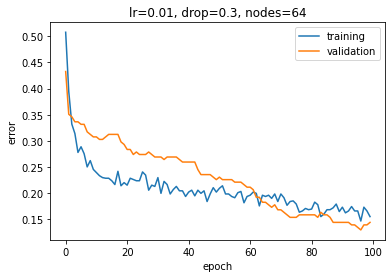

In [5]:
lr=0.01
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=lr),
              metrics=[tf.keras.metrics.BinaryAccuracy(name='binary_accuracy', dtype=None, threshold=0.5)])# we use binary_accuracy to quanitfy network performance. 
        
#Train
NN = model.fit(X_train,Y_train, batch_size=64, epochs=100, validation_split=0.2,verbose=0)

fig, ax = plt.subplots(1, 1)
ax.plot(np.subtract(1,NN.history['binary_accuracy']), label="training")
ax.plot(np.subtract(1,NN.history['val_binary_accuracy']), label="validation")
ax.set_xlabel("epoch")
ax.set_ylabel("error")
ax.legend()
plt.title(f'lr={lr}, drop=0.3, nodes=64')
plt.show()


Epoch 1/100
13/13 [==============================] - 2s 40ms/step - loss: 0.1678 - binary_accuracy: 0.9386 - val_loss: 0.2401 - val_binary_accuracy: 0.9038
Epoch 2/100
13/13 [==============================] - 0s 6ms/step - loss: 0.1681 - binary_accuracy: 0.9230 - val_loss: 0.2299 - val_binary_accuracy: 0.9135
Epoch 3/100
13/13 [==============================] - 0s 7ms/step - loss: 0.1774 - binary_accuracy: 0.9218 - val_loss: 0.2253 - val_binary_accuracy: 0.9087
Epoch 4/100
13/13 [==============================] - 0s 6ms/step - loss: 0.1496 - binary_accuracy: 0.9338 - val_loss: 0.2389 - val_binary_accuracy: 0.9327
Epoch 5/100
13/13 [==============================] - 0s 6ms/step - loss: 0.1308 - binary_accuracy: 0.9410 - val_loss: 0.2364 - val_binary_accuracy: 0.9231
Epoch 6/100
13/13 [==============================] - 0s 7ms/step - loss: 0.1560 - binary_accuracy: 0.9386 - val_loss: 0.2340 - val_binary_accuracy: 0.9231
Epoch 7/100
13/13 [==============================] - 0s 6ms/step - lo

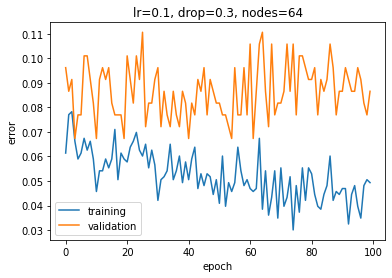

In [40]:
lr=0.1
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=lr),
              metrics=[tf.keras.metrics.BinaryAccuracy(name='binary_accuracy', dtype=None, threshold=0.5)])
NN2 = model.fit(X_train,Y_train, batch_size=64, epochs=100, validation_split=0.2,verbose=1)

fig, ax = plt.subplots(1, 1)
ax.plot(np.subtract(1,NN2.history['binary_accuracy']), label="training")
ax.plot(np.subtract(1,NN2.history['val_binary_accuracy']), label="validation")
ax.set_xlabel("epoch")
ax.set_ylabel("error")
ax.legend()
plt.title(f'lr={lr}, drop=0.3, nodes=64')
plt.show()

In [59]:
#Make a validation data split for grid search

X_train_grid = X_train[:800,:]
X_valid_grid = X_train[800:,:]

Y_train_grid = Y_train[:800]
Y_valid_grid = Y_train[800:]


In [60]:
def classification_error(ytrue,ypred):
  fmask = (ypred == ytrue)
  classific = np.zeros(len(ytrue))
  classific[fmask] = 1
  classific[~fmask]= 0
  return np.mean(1-classific)

def hard_choice(y):
  hard_pred = np.zeros(len(y))  #Make hard classification at 0.5
  hard_pred[y[:,0] >=0.5] = 1
  hard_prediction[y[:,0] <0.5] = 0
  return hard_pred

In [43]:
hard_prediction = hard_choice(prediction)
classification_error(Y_val,hard_prediction)

0.07766990291262135

25/25 [==============================] - 0s 2ms/step


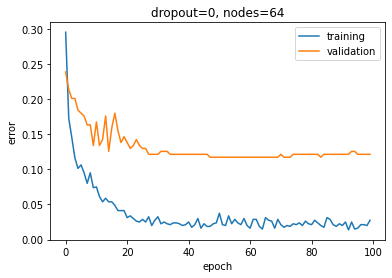

25/25 [==============================] - 0s 2ms/step


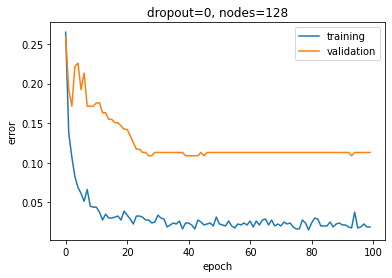

25/25 [==============================] - 0s 2ms/step


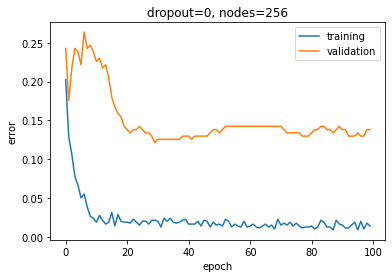

25/25 [==============================] - 0s 14ms/step


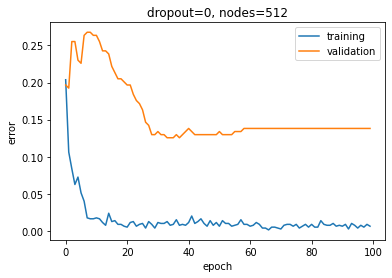

25/25 [==============================] - 0s 2ms/step


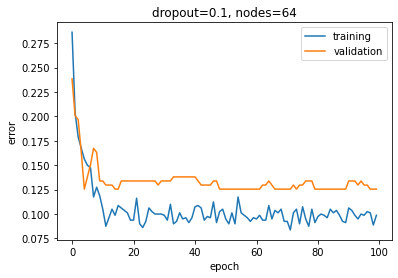

25/25 [==============================] - 0s 2ms/step


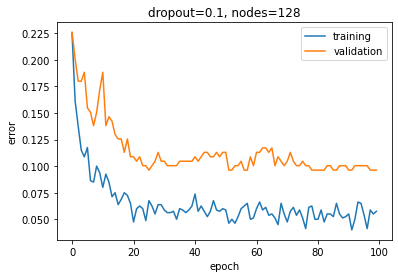

25/25 [==============================] - 0s 2ms/step


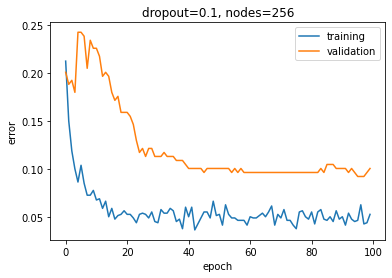

25/25 [==============================] - 0s 2ms/step


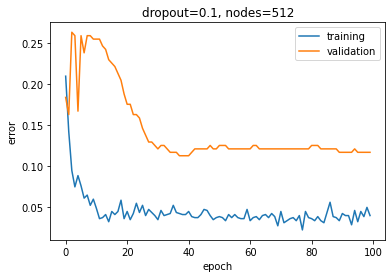

25/25 [==============================] - 0s 2ms/step


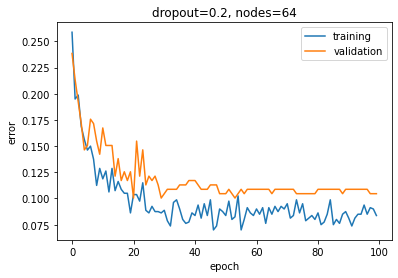

25/25 [==============================] - 0s 2ms/step


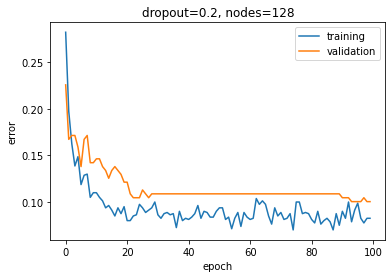

25/25 [==============================] - 0s 2ms/step


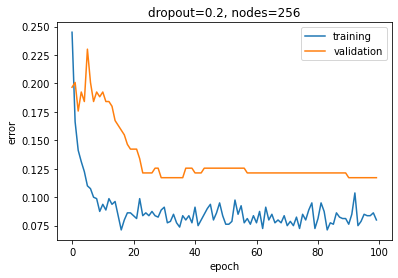

25/25 [==============================] - 0s 2ms/step


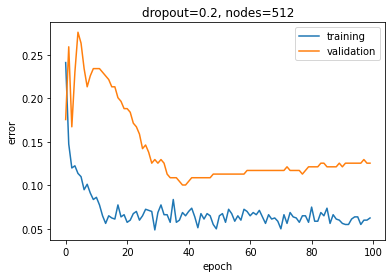

25/25 [==============================] - 0s 2ms/step


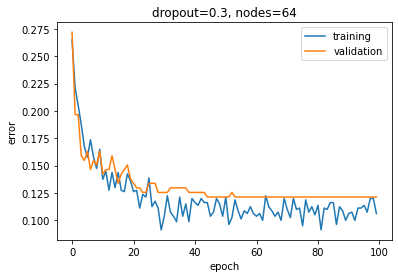

25/25 [==============================] - 0s 2ms/step


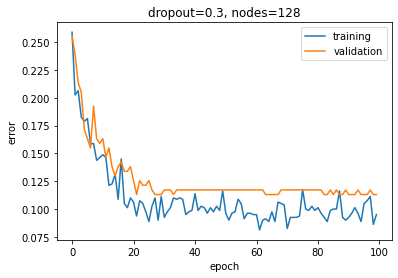

25/25 [==============================] - 0s 9ms/step


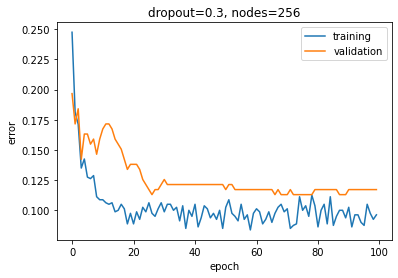

25/25 [==============================] - 0s 2ms/step


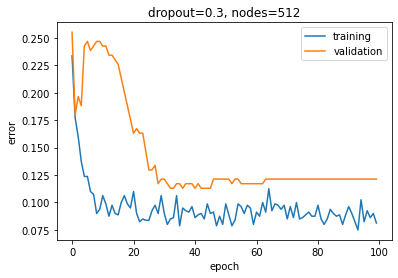

25/25 [==============================] - 1s 40ms/step


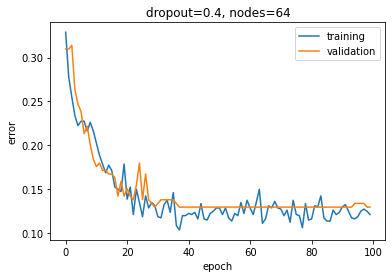

25/25 [==============================] - 0s 2ms/step


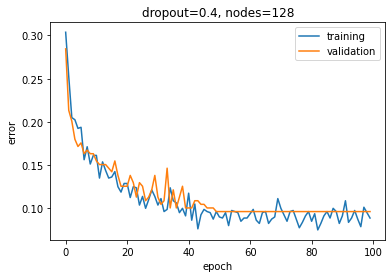

25/25 [==============================] - 0s 2ms/step


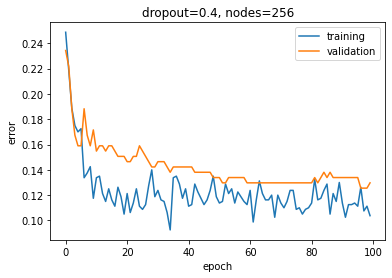

25/25 [==============================] - 0s 2ms/step


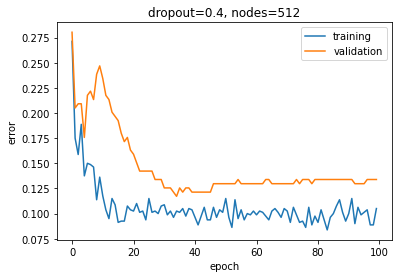

25/25 [==============================] - 1s 31ms/step


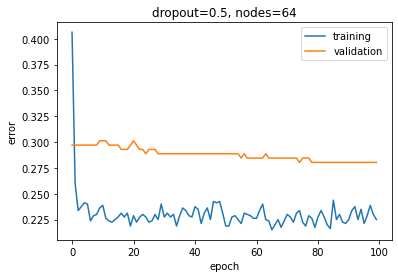

25/25 [==============================] - 1s 28ms/step


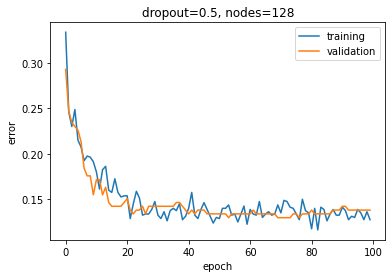

25/25 [==============================] - 0s 15ms/step


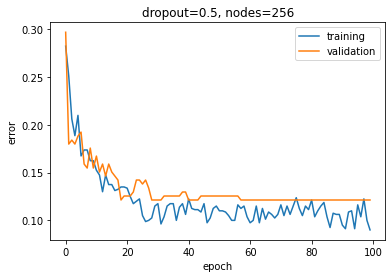

25/25 [==============================] - 0s 2ms/step


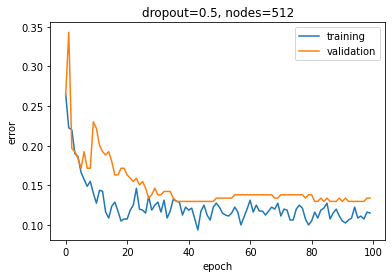

dropout = 0.00, 64 nodes -> accuracy= 0.995,  val_acc = 0.879
dropout = 0.00, 128 nodes -> accuracy= 0.986,  val_acc = 0.887
dropout = 0.00, 256 nodes -> accuracy= 0.996,  val_acc = 0.862
dropout = 0.00, 512 nodes -> accuracy= 1.000,  val_acc = 0.862
dropout = 0.10, 64 nodes -> accuracy= 0.932,  val_acc = 0.874
dropout = 0.10, 128 nodes -> accuracy= 0.978,  val_acc = 0.904
dropout = 0.10, 256 nodes -> accuracy= 0.984,  val_acc = 0.900
dropout = 0.10, 512 nodes -> accuracy= 0.993,  val_acc = 0.883
dropout = 0.20, 64 nodes -> accuracy= 0.956,  val_acc = 0.895
dropout = 0.20, 128 nodes -> accuracy= 0.951,  val_acc = 0.900
dropout = 0.20, 256 nodes -> accuracy= 0.950,  val_acc = 0.883
dropout = 0.20, 512 nodes -> accuracy= 0.968,  val_acc = 0.874
dropout = 0.30, 64 nodes -> accuracy= 0.931,  val_acc = 0.879
dropout = 0.30, 128 nodes -> accuracy= 0.945,  val_acc = 0.887
dropout = 0.30, 256 nodes -> accuracy= 0.945,  val_acc = 0.883
dropout = 0.30, 512 nodes -> accuracy= 0.944,  val_acc = 0.

In [63]:
#GRID search for optimal model
dropout_values = [0, 0.1, 0.2, 0.3, 0.4, 0.5 ]
n_nodes_values = [64,128,256,512]

results_gridsearch = np.zeros((len(dropout_values), len(n_nodes_values), 2))
for iDrop, dr in enumerate(dropout_values):
  for iN, nodes in enumerate(n_nodes_values):
    model_g = tf.keras.Sequential(
    [
    Dense(nodes, input_dim=np.shape(X_train)[1]),
    BatchNormalization(),
    Activation('relu'),
    Dropout(dr),
    Dense(nodes),
    BatchNormalization(),
    Activation('relu'),
    Dropout(dr),
    Dense(nodes),
    BatchNormalization(),
    Activation('relu'),
    Dropout(dr),
    Dense(1,activation='sigmoid')
      ])

    model_g.compile(
        loss='binary_crossentropy', 
        optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
        metrics=['binary_accuracy']) 
    #Include auto reduce  Learning rate. As expected with SGD it is needed to dampen the noise when we are close to the minimum 
    reduce_lr = ReduceLROnPlateau(monitor='val_binary_accuracy', factor=0.1,patience=5, min_lr=0.001)
    
    gridNN = model_g.fit(
        X_train_grid, Y_train_grid,
        validation_data=(X_valid_grid, Y_valid_grid),
        #validation_split=0.2,
        batch_size=64,
        epochs=100,
        verbose=0 ,callbacks=[reduce_lr])   
    #Store max acc, and val acc achieved for each hyperparameter config
    #results_gridsearch[iDrop, iN,0] = np.max(gridNN.history['binary_accuracy'])
    #results_gridsearch[iDrop, iN,1] = np.max(gridNN.history['val_binary_accuracy'])

    #Alt val error
    vprediction = model_g.predict(X_valid_grid)
    hard_pred_val = np.zeros(len(Y_valid_grid)) 
    hard_pred_val[vprediction[:,0] >=0.5] = 1 
    hard_pred_val[vprediction[:,0] <0.5] = 0    
    val_acc = np.mean(hard_pred_val == Y_valid_grid)
    results_gridsearch[iDrop, iN,1] = val_acc

    #Train error
    prediction = model_g.predict(X_train_grid)
    hard_pred_tr = np.zeros(len(Y_train_grid))  
    hard_pred_tr[prediction[:,0] >=0.5] = 1
    hard_pred_tr[prediction[:,0] <0.5] = 0
    train_acc = np.mean(hard_pred_tr == Y_train_grid)
    results_gridsearch[iDrop, iN,0] = train_acc  


    fig, ax = plt.subplots(1, 1)
    ax.plot(np.subtract(1,gridNN.history['binary_accuracy']), label="training")
    ax.plot(np.subtract(1,gridNN.history['val_binary_accuracy']), label="validation")
    ax.set_xlabel("epoch")
    ax.set_ylabel("error")
    ax.legend()
    plt.title(f'dropout={dr}, nodes={nodes}')
    plt.show()

for iDrop, dr in enumerate(dropout_values):
  for iN, nodes in enumerate(n_nodes_values):
    print(f"dropout = {dr:.2f}, {nodes} nodes -> accuracy= {results_gridsearch[iDrop, iN,0]:.3f},  val_acc = {results_gridsearch[iDrop, iN,1]:.3f}")

In [65]:
#Evaluate Model with 10 fold Cross Validation for Comparison with Other Methods

#Final Choice of Architecture and Hyperparameters NN Definition
dropout = 0.1
nodes = 128
n_fold = 10
n_epochs = 100


#print(model.summary())

reduce_lr = ReduceLROnPlateau(monitor='val_binary_accuracy', factor=0.1,patience=5, min_lr=0.001, verbose=1)
n=1

cv = skl_ms.KFold(n_splits=n_fold, random_state=2, shuffle=True)  #Val split function
validation_error = 0  #Initialize validation error
for train_index, val_index in cv.split(X_train):
    X_t, X_val = X_train[train_index], X_train[val_index]
    Y_t, Y_val = Y_train[train_index], Y_train[val_index]

    model = tf.keras.Sequential(
    [
    Dense(nodes, input_dim=np.shape(X_train)[1]),
    BatchNormalization(),
    Activation('relu'),
    Dropout(dropout),
    Dense(nodes),
    BatchNormalization(),
    Activation('relu'),
    Dropout(dropout),
    Dense(nodes),
    BatchNormalization(),
    Activation('relu'),
    Dropout(dropout),
    Dense(1,activation='sigmoid') #Single Output Node with Sigmoid activation for Classification
])
    model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
              metrics=[tf.keras.metrics.BinaryAccuracy(
    name='binary_accuracy', dtype=None, threshold=0.5)])


    model.fit(X_t, Y_t, batch_size=64, epochs=n_epochs,validation_data=(X_val, Y_val), callbacks=[reduce_lr],verbose=0)
    prediction = model.predict(X_val)

    hard_prediction = np.zeros(len(Y_val))  #Make hard classification at 0.5
    hard_prediction[prediction[:,0] >=0.5] = 1
    hard_prediction[prediction[:,0] <0.5] = 0
    print(f"{n}#fold {np.mean(hard_prediction != Y_val):.3f}")
    n=n+1
    validation_error += np.mean(hard_prediction != Y_val)
validation_error/= n_fold
print("10fold Cross Validation Error =",validation_error)



Epoch 8: ReduceLROnPlateau reducing learning rate to 0.010000000149011612.

Epoch 13: ReduceLROnPlateau reducing learning rate to 0.001.
4/4 [==============================] - 0s 93ms/step
1#fold 0.077

Epoch 22: ReduceLROnPlateau reducing learning rate to 0.010000000149011612.

Epoch 27: ReduceLROnPlateau reducing learning rate to 0.001.
4/4 [==============================] - 0s 127ms/step
2#fold 0.115

Epoch 9: ReduceLROnPlateau reducing learning rate to 0.010000000149011612.

Epoch 18: ReduceLROnPlateau reducing learning rate to 0.001.
4/4 [==============================] - 0s 3ms/step
3#fold 0.087

Epoch 16: ReduceLROnPlateau reducing learning rate to 0.010000000149011612.

Epoch 29: ReduceLROnPlateau reducing learning rate to 0.001.
4/4 [==============================] - 1s 144ms/step
4#fold 0.077

Epoch 19: ReduceLROnPlateau reducing learning rate to 0.010000000149011612.

Epoch 24: ReduceLROnPlateau reducing learning rate to 0.001.
4/4 [==============================] - 0s 102m